In [3]:
#For analysis
import pandas as pd
import numpy as np

#Visulization purpose
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#For performing statstical model
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests


## Importing the Data

In [5]:
data = pd.read_csv('data folder/BTC-USD DAILY.csv')

### Basic analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1492 non-null   object 
 1   Open       1492 non-null   float64
 2   High       1492 non-null   float64
 3   Low        1492 non-null   float64
 4   Close      1492 non-null   float64
 5   Adj Close  1492 non-null   float64
 6   Volume     1492 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.7+ KB


#### About the data
***
- `Date:` This column records the specific date and time at which the financial market data was collected or recorded. It serves as the chronological marker for each entry in the dataset.
***
- `Open:` This column denotes the opening price of the financial asset (in this case, Bitcoin) at the beginning of a given trading period, whether it's a day, hour, etc.
***
- `High:` This column represents the highest price that Bitcoin reached during the specified time period.
***
- `Low:` The lowest price observed for Bitcoin during the same trading period.
***
- `Close:` This column shows the closing price of Bitcoin at the end of the specified time period.
***
- `Adj Close:` This column refers to the adjusted closing price. The adjusted closing price takes into account corporate actions, such as dividends, stock splits, or other market events that may affect the closing price, providing a more accurate reflection of the asset's value.
***
- `Volume:` This column records the total amount of Bitcoin traded during the specified time frame. It indicates the total number of Bitcoin units bought and sold within that period.
___

In [7]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [8]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03
mean,18834.412309,19328.141889,18277.369294,18847.704874,18847.704874,2.583255e+10
std,17877.430021,18363.563384,17309.553030,17878.523772,17878.523772,2.103589e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7184.975952,7320.137085,6939.701782,7186.172241,7186.172241,8.475918e+09
50%,9543.832032,9717.452148,9358.137695,9544.869629,9544.869629,2.247845e+10
75%,32745.621582,33915.827149,31244.488770,32792.104492,32792.104492,3.620490e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


## Report 1
   - There are  `1492 entries` and `6 columns` in the dataset
   - The standard deviation is large relative to the mean, it indicates that the data points are more spread out from the mean, implying higher variability or dispersion within the dataset.
   - And there is no null values in the dataset
   - This is a relatively high volume, which indicates that there is a lot of interest in the stock or cryptocurrency.

In [10]:
# Convert the Date column to Datetime column

data['Date'] = pd.to_datetime(data['Date'])
data_2 = data.set_index('Date')

# Univarint Analysis 

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [12]:
# Line Plot of the data 
fig = px.line(data, x='Date', y=['Open', 'High', 'Low', 'Close', 'Adj Close'],
              title='Time Series Data - Line Plots')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Values')

fig.show()

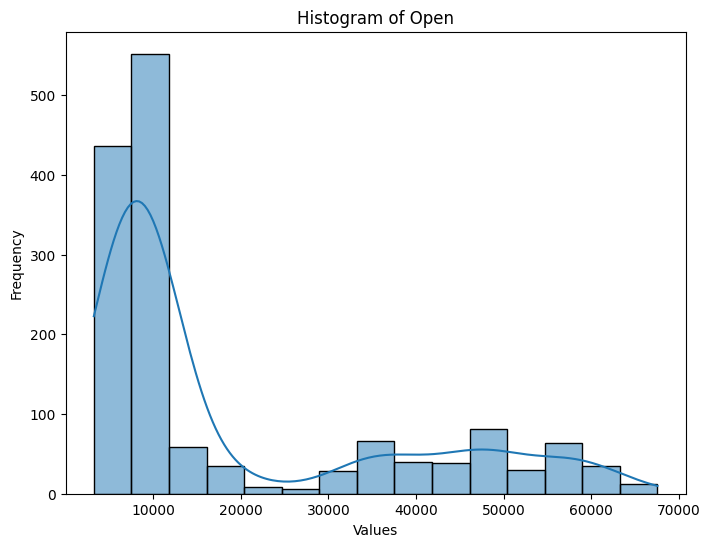

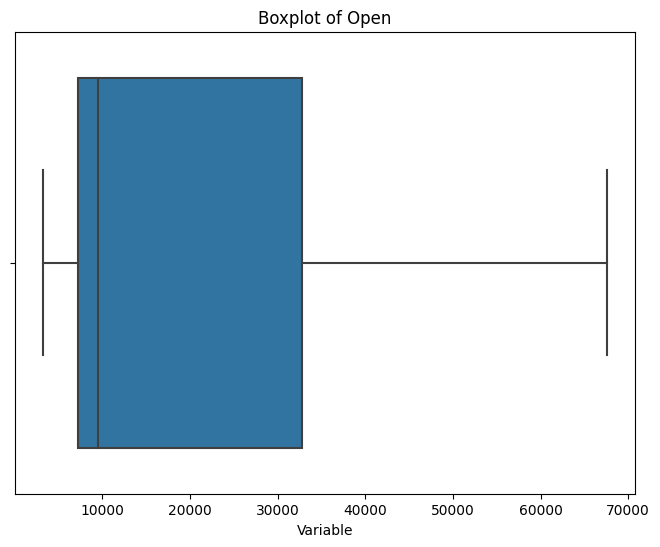

C:\Users\91845\AppData\Local\Temp\ipykernel_30428\2461001788.py:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




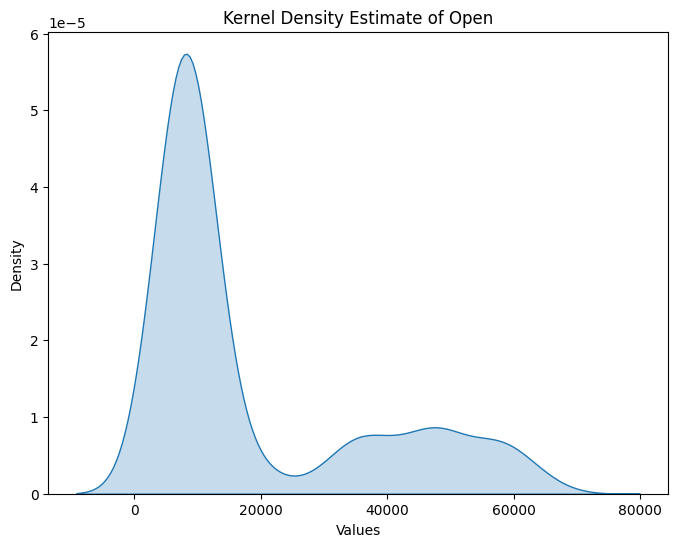

Mean of Open: 18834.412308733914
Median of Open: 9543.8320315
Standard Deviation of Open: 17877.430021447508


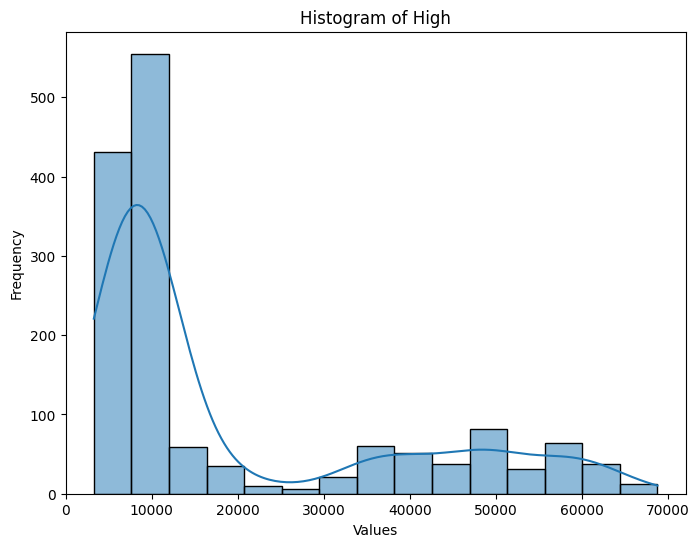

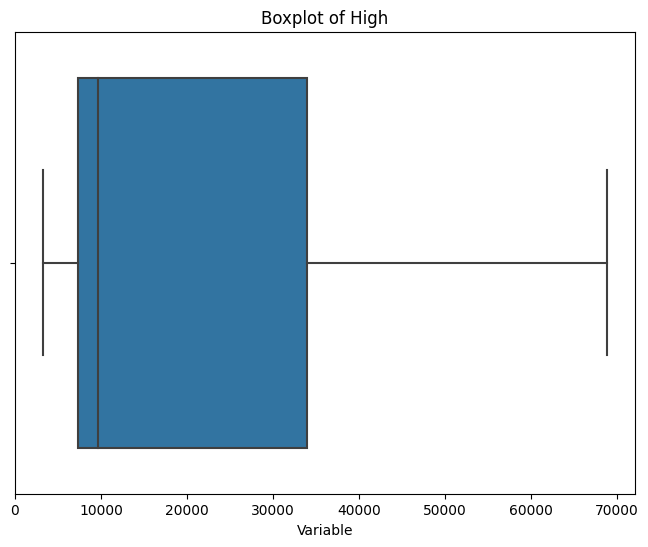

C:\Users\91845\AppData\Local\Temp\ipykernel_30428\2461001788.py:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




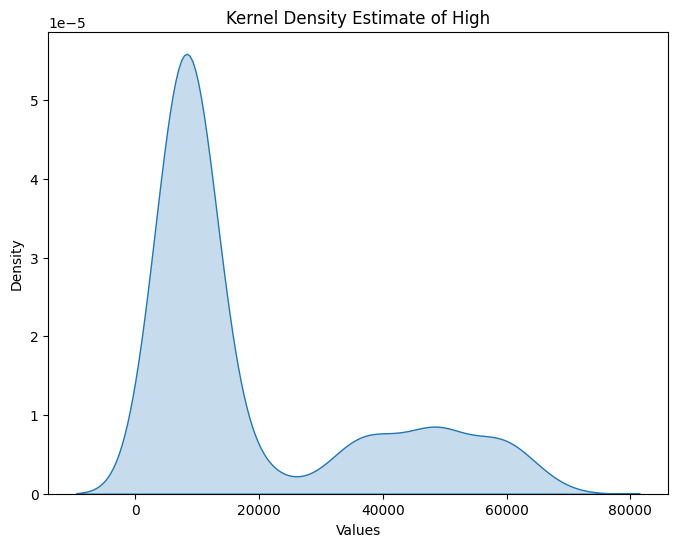

Mean of High: 19328.141889123322
Median of High: 9717.452148
Standard Deviation of High: 18363.56338436829


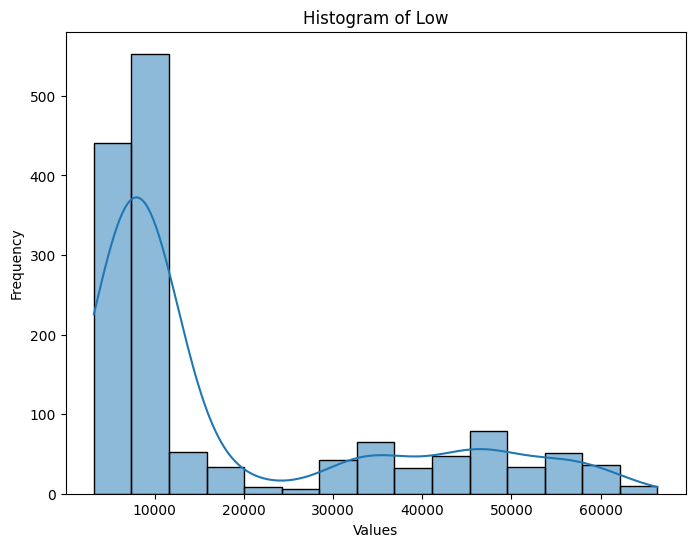

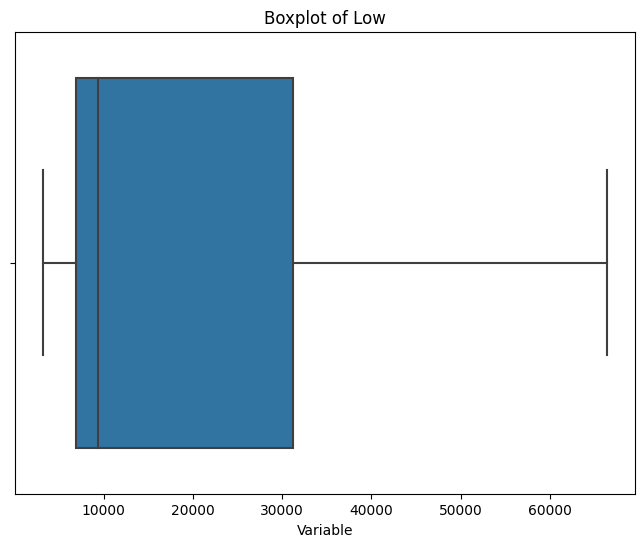

C:\Users\91845\AppData\Local\Temp\ipykernel_30428\2461001788.py:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




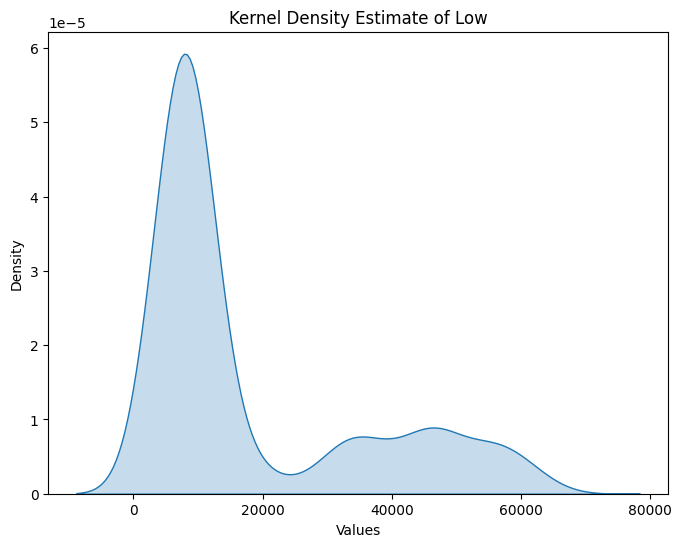

Mean of Low: 18277.369294321044
Median of Low: 9358.137695000001
Standard Deviation of Low: 17309.55302959927


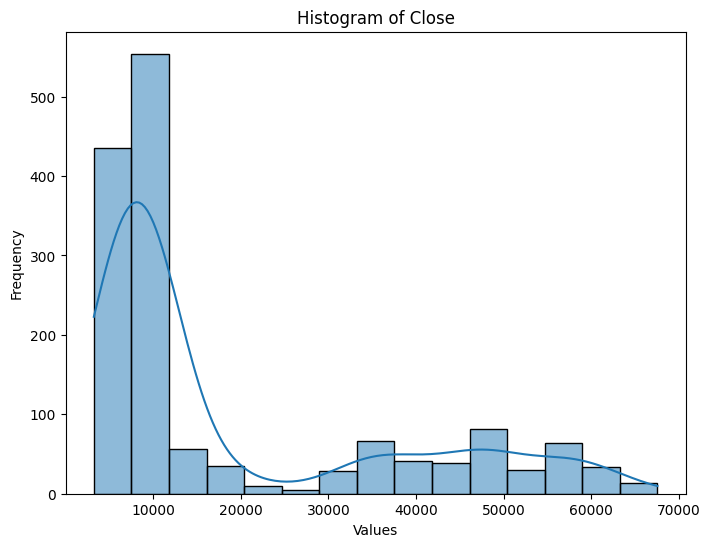

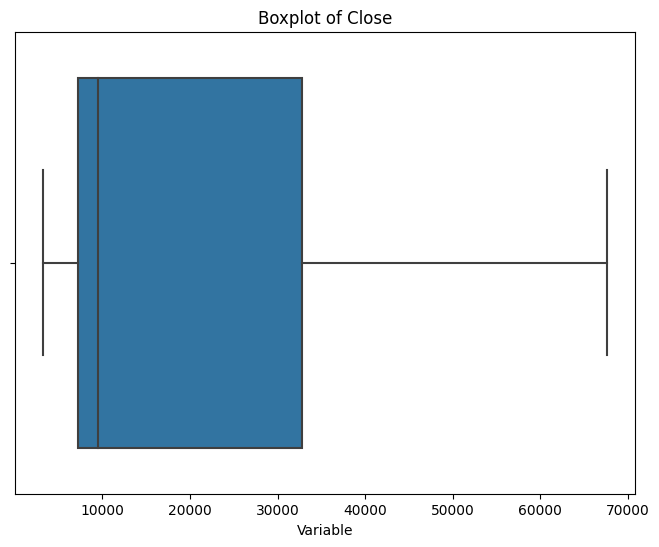

C:\Users\91845\AppData\Local\Temp\ipykernel_30428\2461001788.py:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




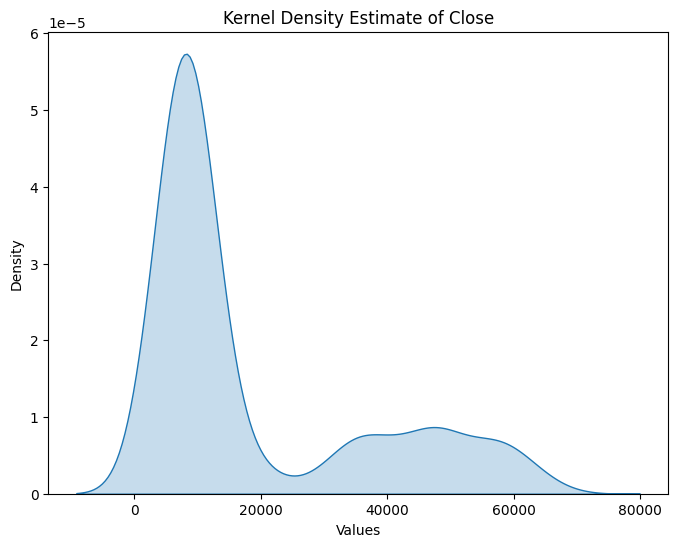

Mean of Close: 18847.704873619303
Median of Close: 9544.869629
Standard Deviation of Close: 17878.52377195851


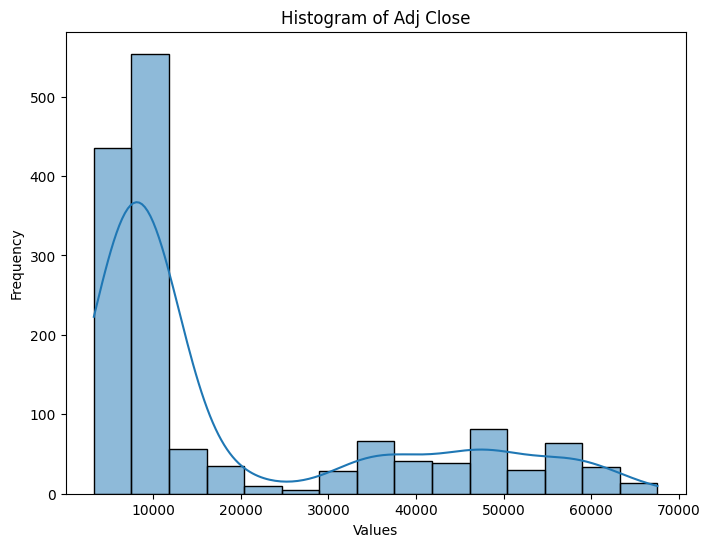

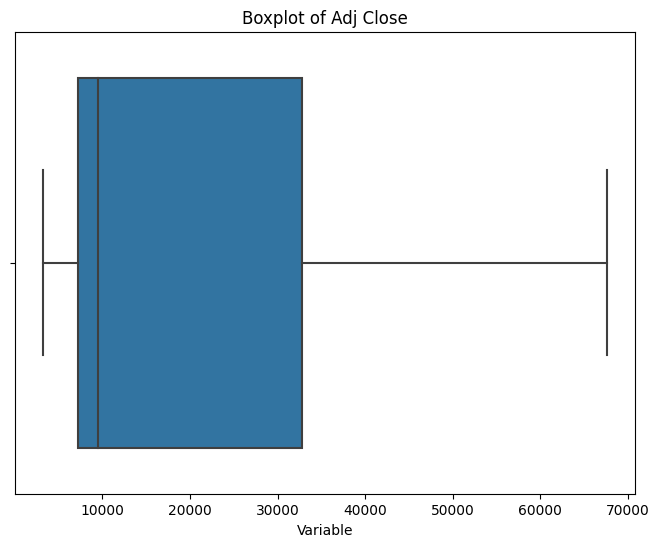

C:\Users\91845\AppData\Local\Temp\ipykernel_30428\2461001788.py:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




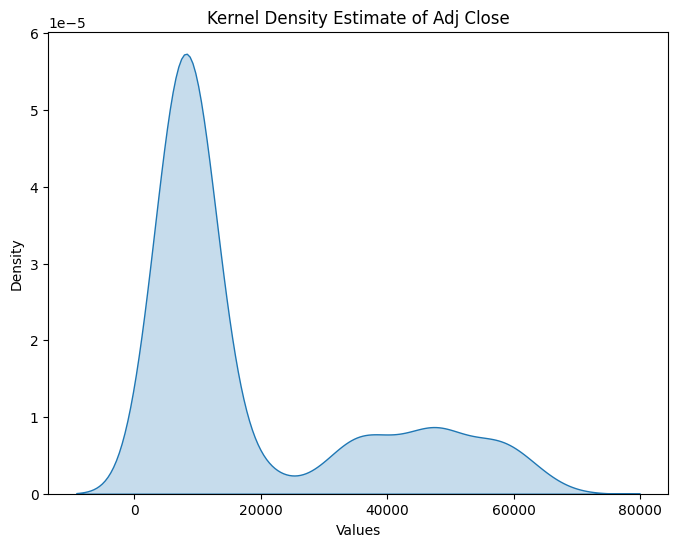

Mean of Adj Close: 18847.704873619303
Median of Adj Close: 9544.869629
Standard Deviation of Adj Close: 17878.52377195851


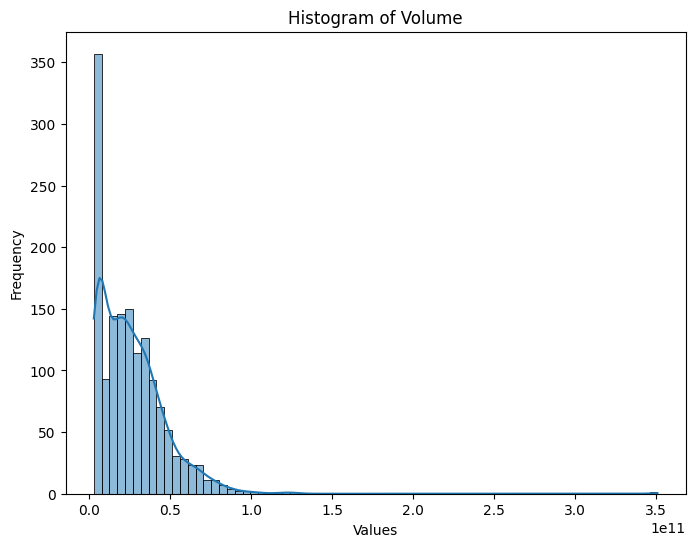

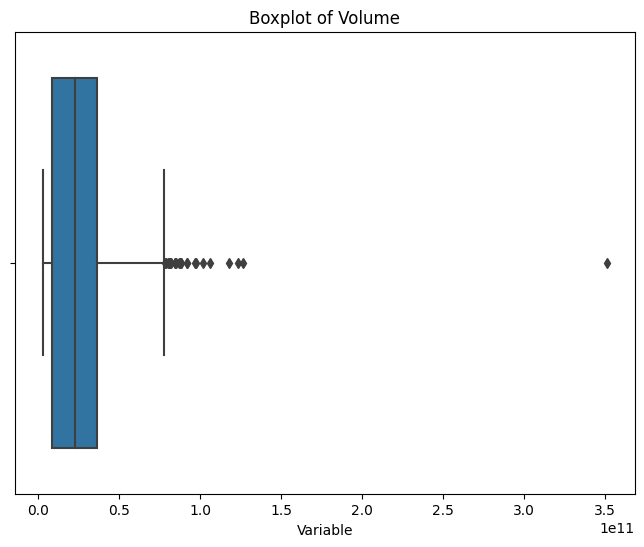

C:\Users\91845\AppData\Local\Temp\ipykernel_30428\2461001788.py:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




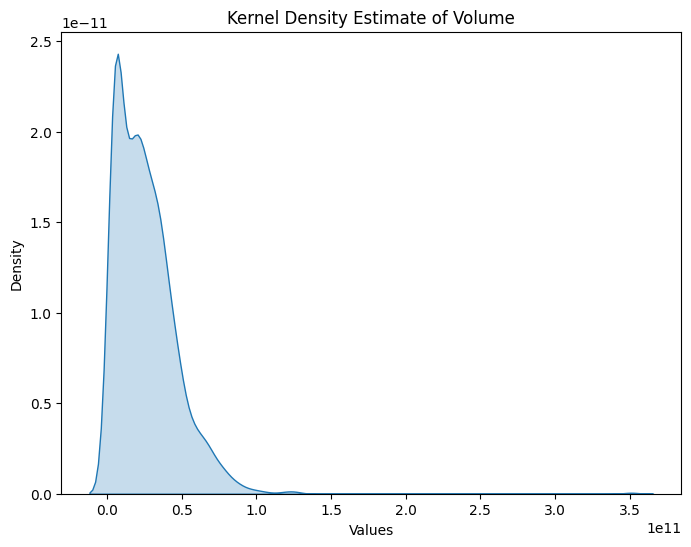

Mean of Volume: 25832552378.158848
Median of Volume: 22478454184.5
Standard Deviation of Volume: 21035886907.40186


In [14]:
for column_name in data.columns[1:]:
    # Plotting Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_name], kde=True)
    plt.title('Histogram of ' + column_name)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

    # Plotting Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])
    plt.title('Boxplot of ' + column_name)
    plt.xlabel('Variable')
    plt.show()

    # Plotting Kernel Density Estimate (KDE)
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[column_name], shade=True)
    plt.title('Kernel Density Estimate of ' + column_name)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

    # Summary statistics
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    std_deviation = data[column_name].std()

    print(f"Mean of {column_name}: {mean_value}")
    print(f"Median of {column_name}: {median_value}")
    print(f"Standard Deviation of {column_name}: {std_deviation}")

## Report  
 ---


# Multivarint analysis

- # Correlation

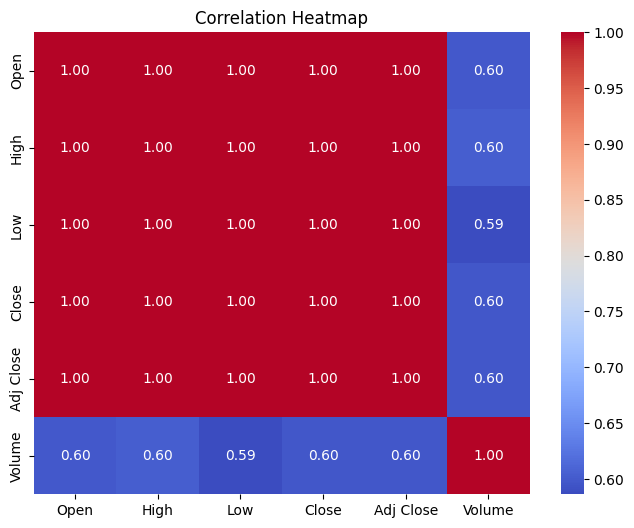

In [34]:
correlation_matrix = data_2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
for col in data_2.columns:   
    fig = px.scatter(data, x='Date', y=[col], title='Time Series Data - Scatter Plot')
    fig.update_xaxes(title='Date')
    fig.update_yaxes(title='Values')
    fig.show()

In [42]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Load your multivariate time series data into a Pandas DataFrame

# Perform Johansen's test for cointegration
result = coint_johansen(data[['Open','Close','High','Low']], det_order=0, k_ar_diff=1)

# Output the results
print("Trace Statistics:")
print(result.lr1)  # Trace test statistics
print("\nCritical Values (90%, 95%, 99%):")
print(result.cvt)  # Critical values for the trace test

print("\nEigen Statistics:")
print(result.lr2)  # Eigenvalue test statistics
print("\nCritical Values (90%, 95%, 99%):")
print(result.cvm)  # Critical values for the eigenvalue test

Trace Statistics:
[1.71306610e+03 9.26834422e+02 2.94566704e+02 6.18926383e-01]

Critical Values (90%, 95%, 99%):
[[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Eigen Statistics:
[7.86231678e+02 6.32267718e+02 2.93947777e+02 6.18926383e-01]

Critical Values (90%, 95%, 99%):
[[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


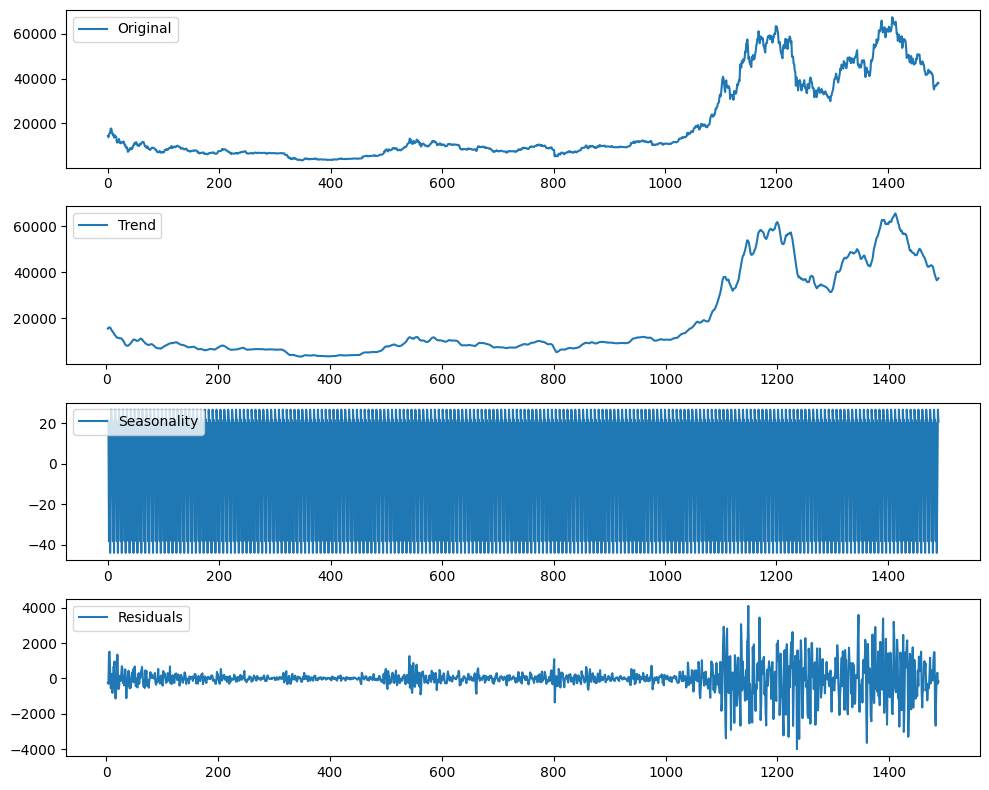

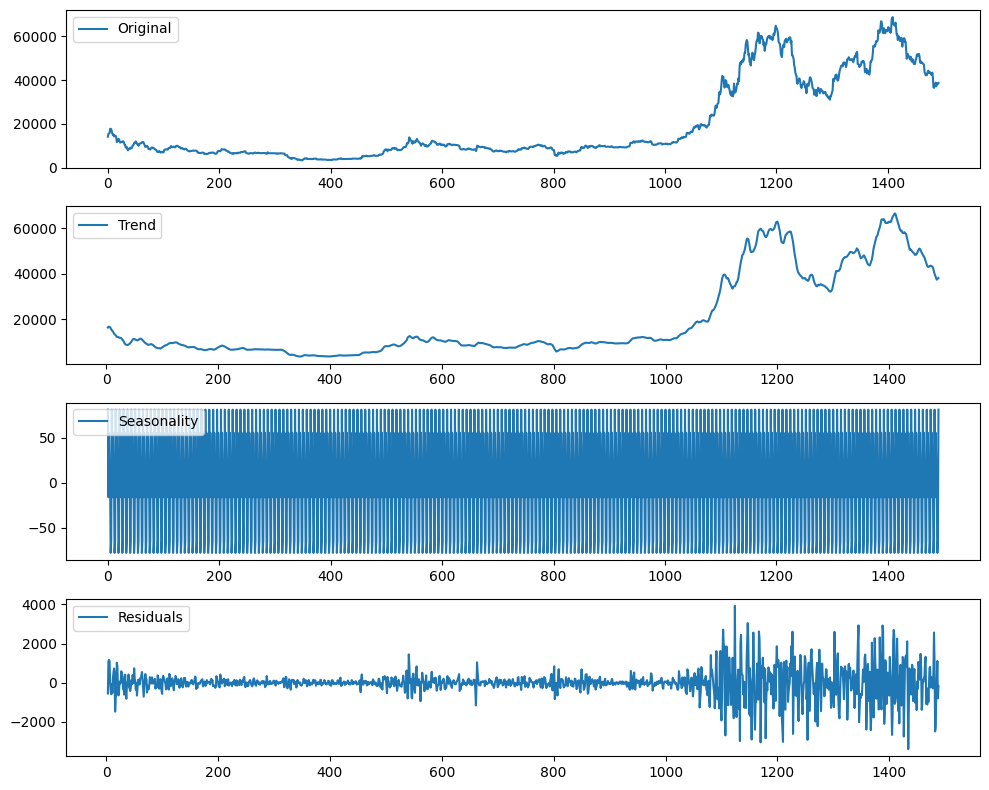

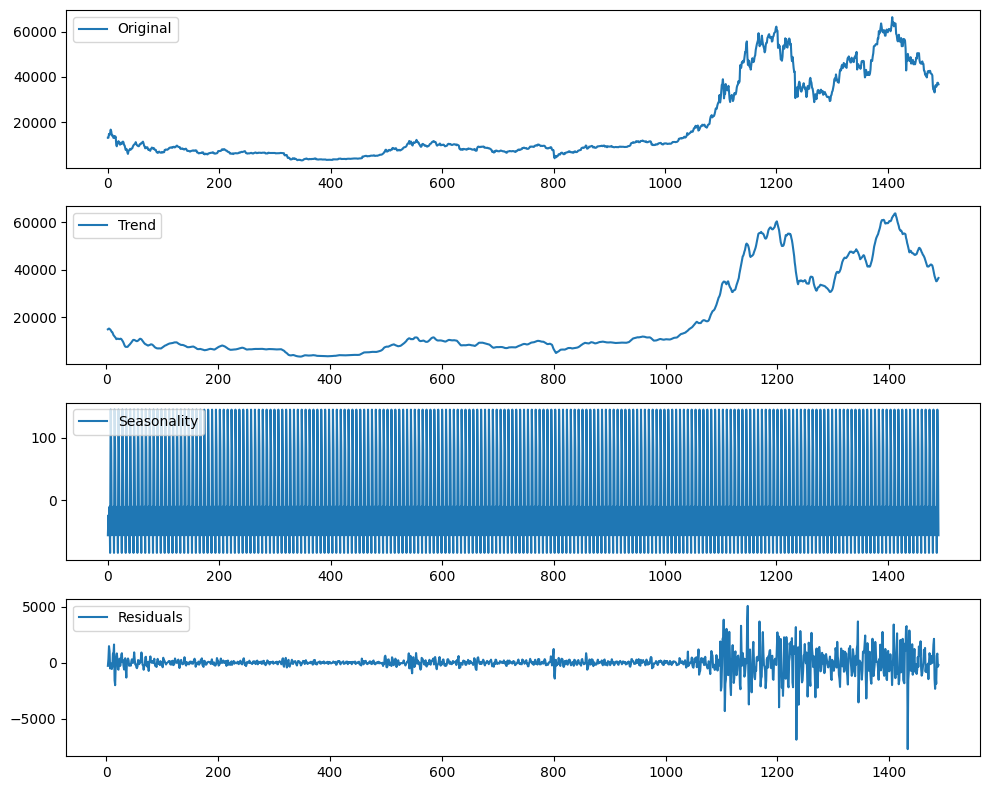

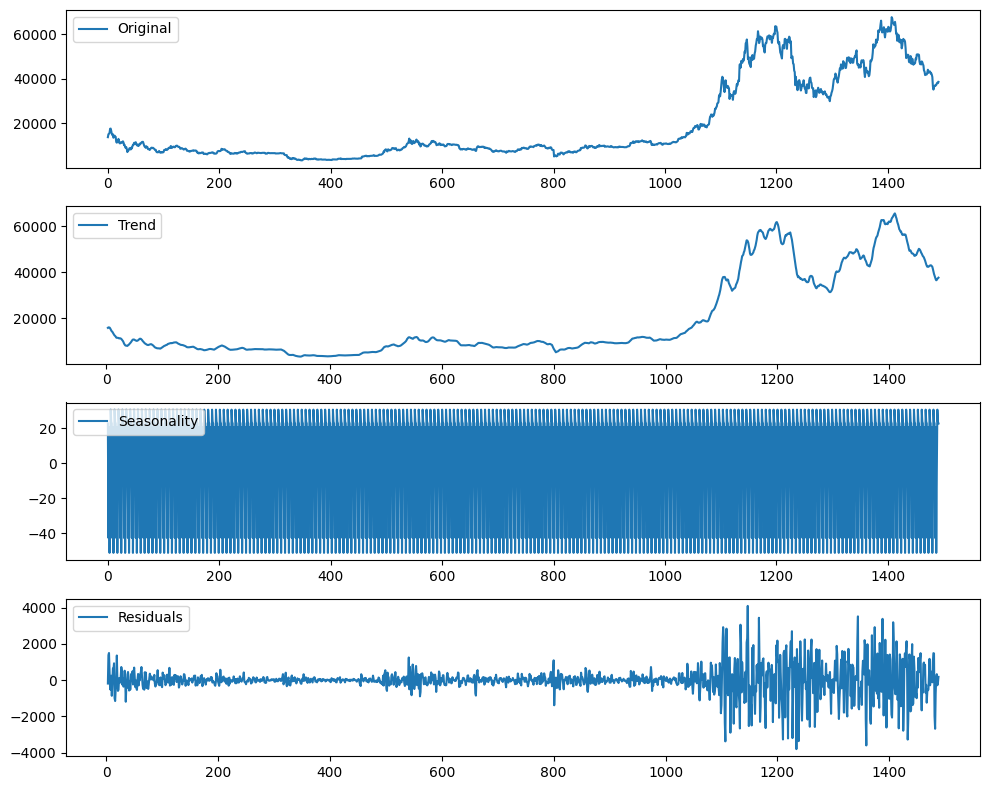

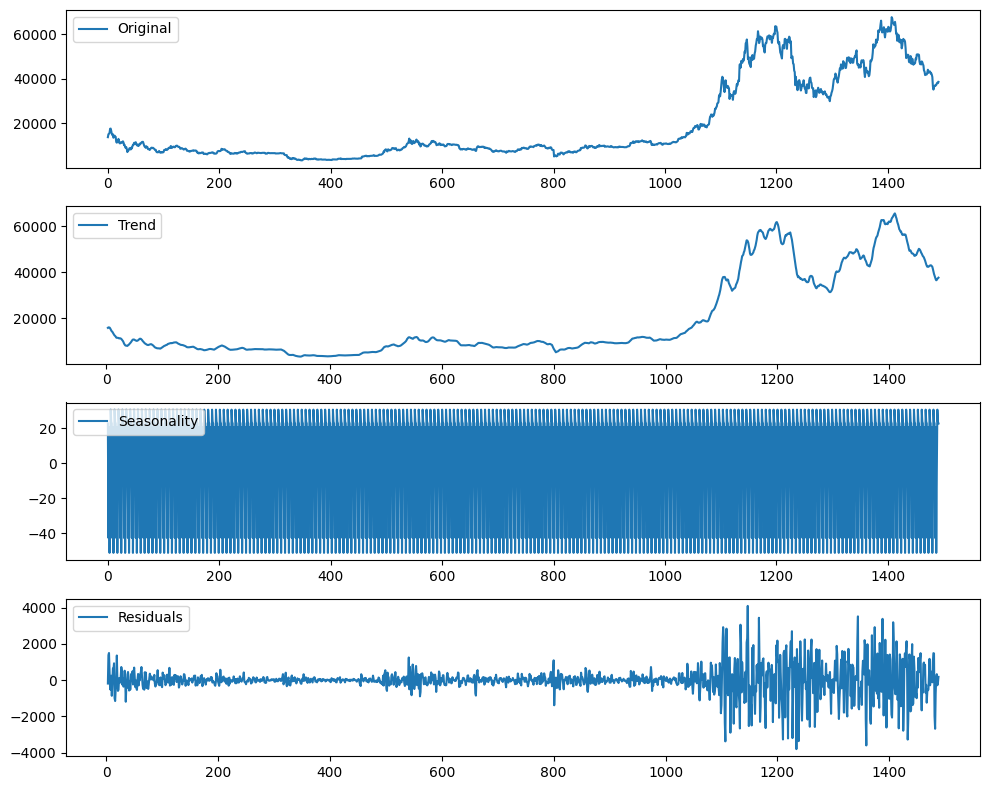

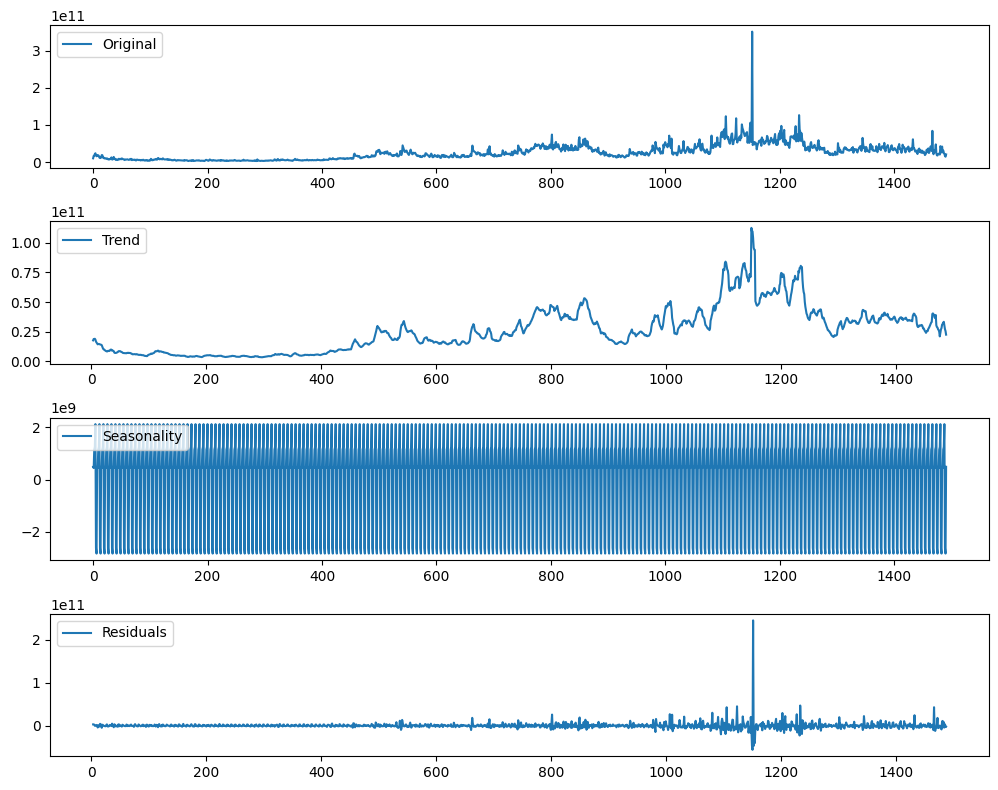

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose


for col in data.columns[1:]:
    decomposition = seasonal_decompose(data_2[col], model='additive')

    # Plotting the decomposed components
    plt.figure(figsize=(10, 8))


    plt.subplot(411)
    plt.plot(data.index, data[col], label='Original')
    plt.legend(loc='upper left')

    plt.subplot(412)
    plt.plot(data.index, decomposition.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(data.index, decomposition.seasonal, label='Seasonality')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(data.index, decomposition.resid, label='Residuals')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


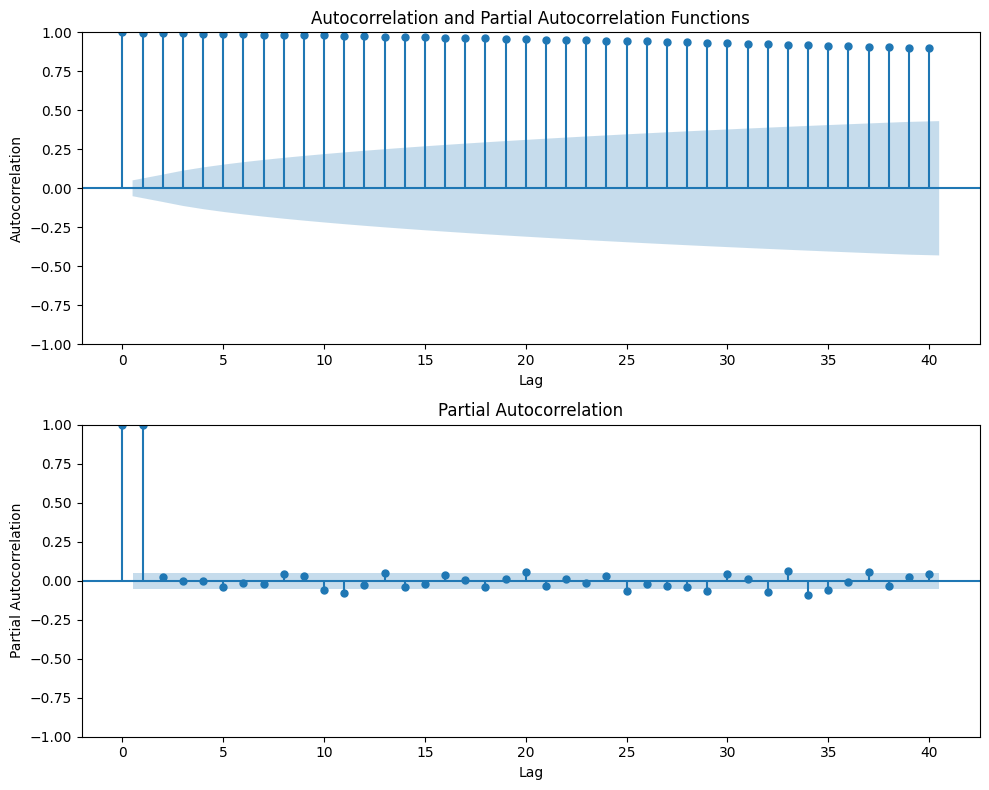

In [64]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculating autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting autocorrelation function (ACF)
plot_acf(data['Open'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation and Partial Autocorrelation Functions')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')

# Plotting partial autocorrelation function (PACF)
plot_pacf(data['Open'], lags=40, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()


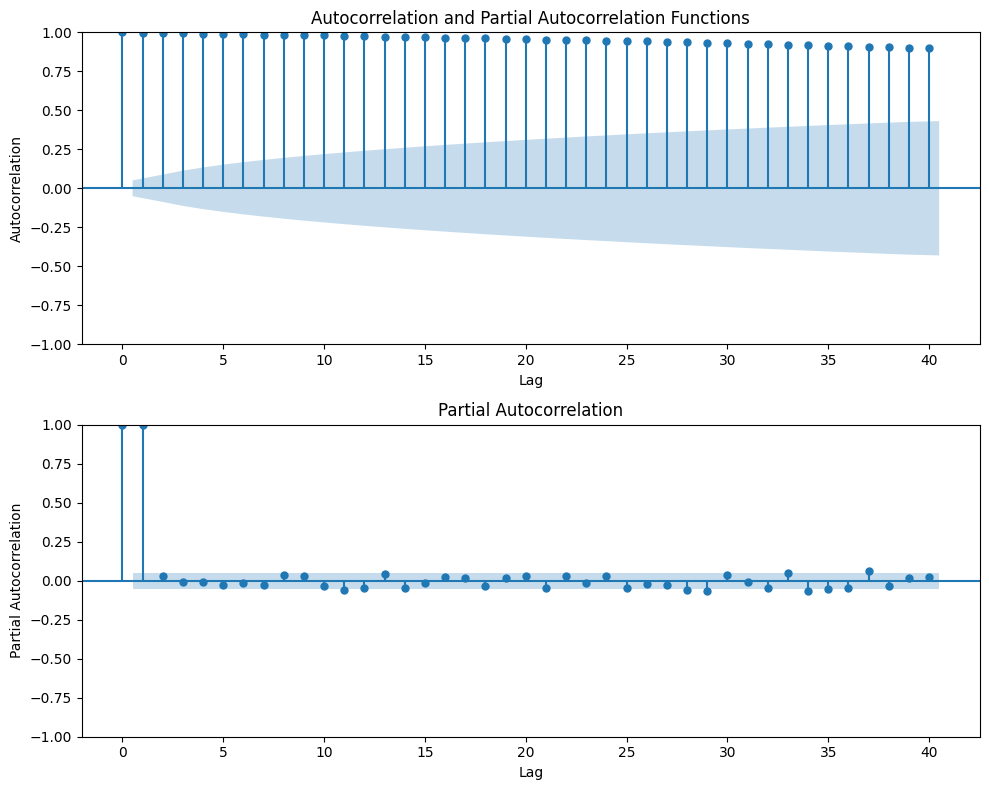

In [67]:
# Calculating autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting autocorrelation function (ACF)
plot_acf(data['Close'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation and Partial Autocorrelation Functions')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')

# Plotting partial autocorrelation function (PACF)
plot_pacf(data['Close'], lags=40, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

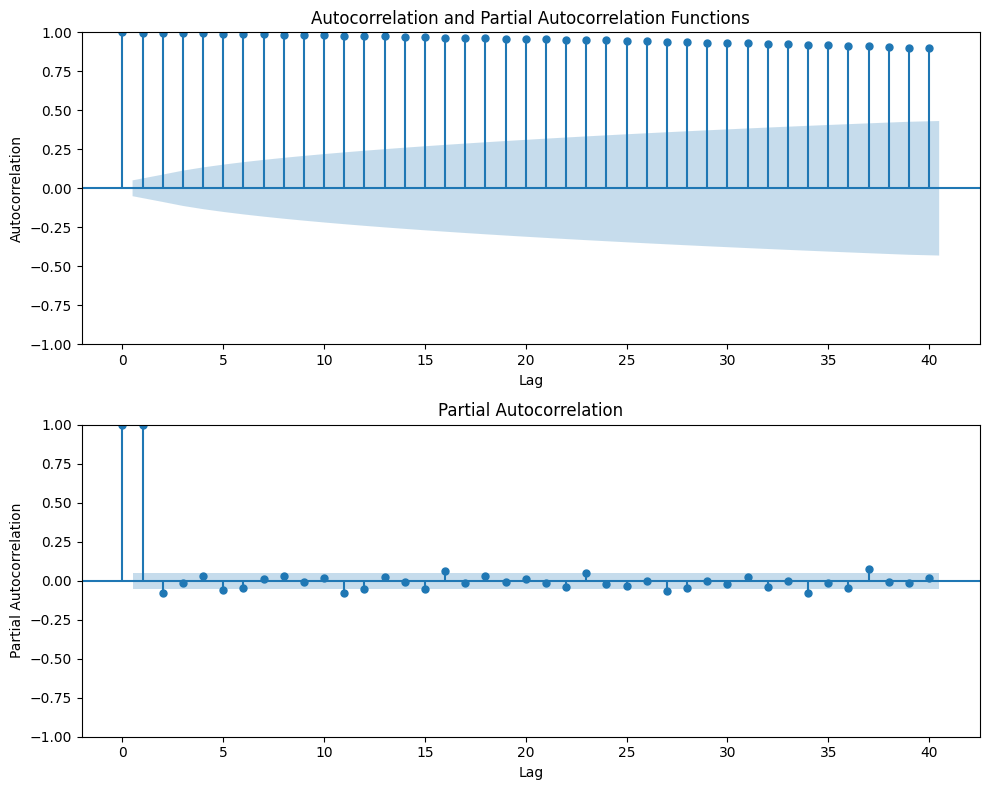

In [68]:
# Calculating autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting autocorrelation function (ACF)
plot_acf(data['High'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation and Partial Autocorrelation Functions')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')

# Plotting partial autocorrelation function (PACF)
plot_pacf(data['High'], lags=40, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

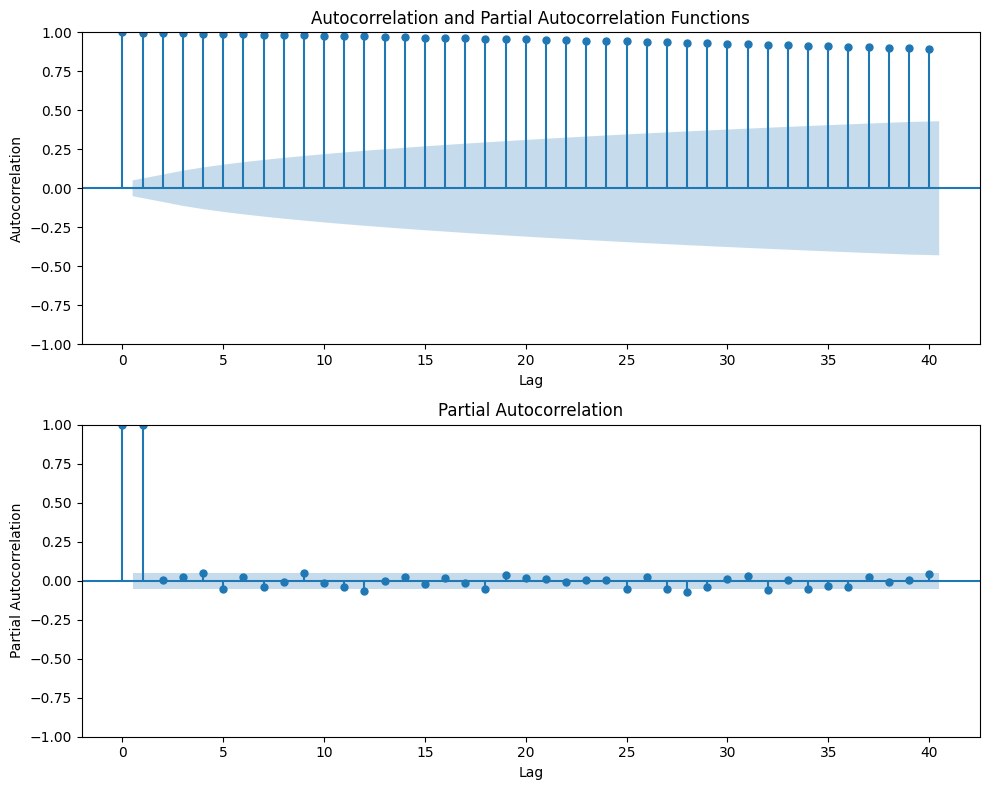

In [69]:
# Calculating autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotting autocorrelation function (ACF)
plot_acf(data['Low'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation and Partial Autocorrelation Functions')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')

# Plotting partial autocorrelation function (PACF)
plot_pacf(data['Low'], lags=40, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

## Report


`1. The first plot shows the autocorrelation function (ACF) of the residuals from the seasonal decomposition of the time series. The ACF measures the correlation between the residuals at different time lags. The second plot shows the partial autocorrelation function (PACF) of the residuals.`

`2. The PACF measures the correlation between the residuals at different time lags, after removing the effects of the correlations at shorter lags.`

`3. The ACF and PACF plots show that the residuals are not significantly correlated at any of the lags. This suggests that the seasonal decomposition has removed all of the significant autocorrelation from the time series.`

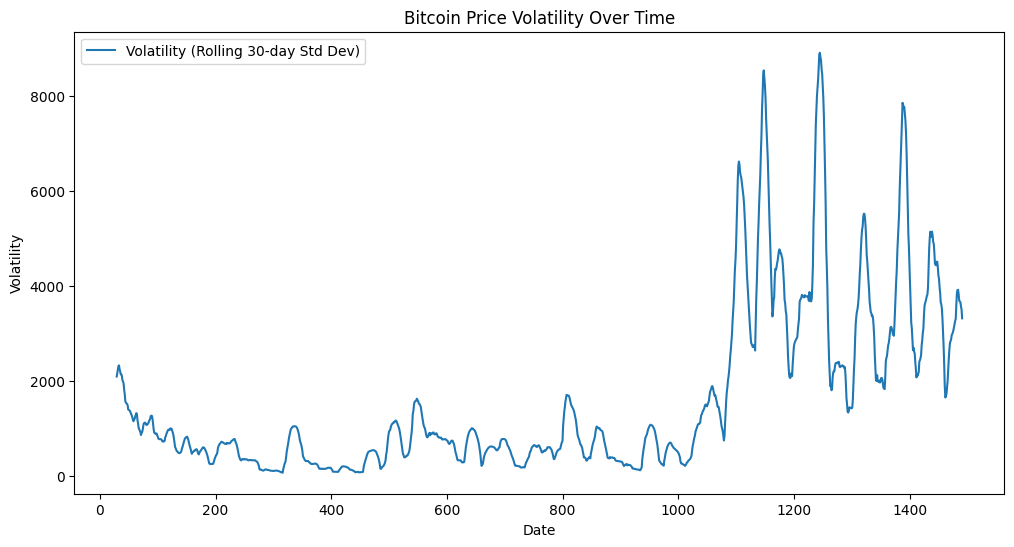

In [72]:
# Calculate volatility (rolling standard deviation)
window = 30  # Adjust window size as needed
data['Volatility'] = data['Close'].rolling(window=window).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='Volatility (Rolling 30-day Std Dev)')
plt.title('Bitcoin Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

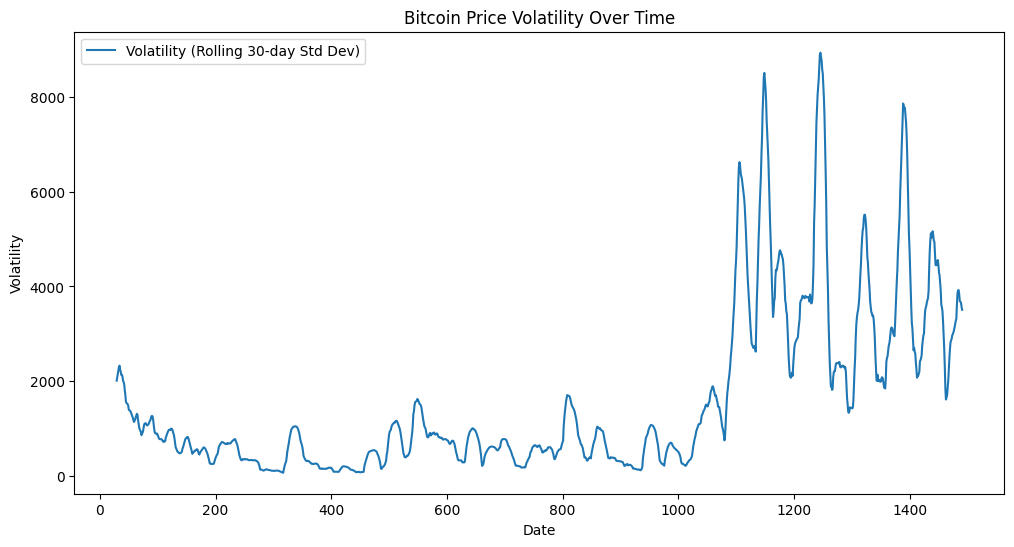

In [73]:
window = 30  # Adjust window size as needed
data['Volatility_Open'] = data['Open'].rolling(window=window).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility_Open'], label='Volatility (Rolling 30-day Std Dev)')
plt.title('Bitcoin Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

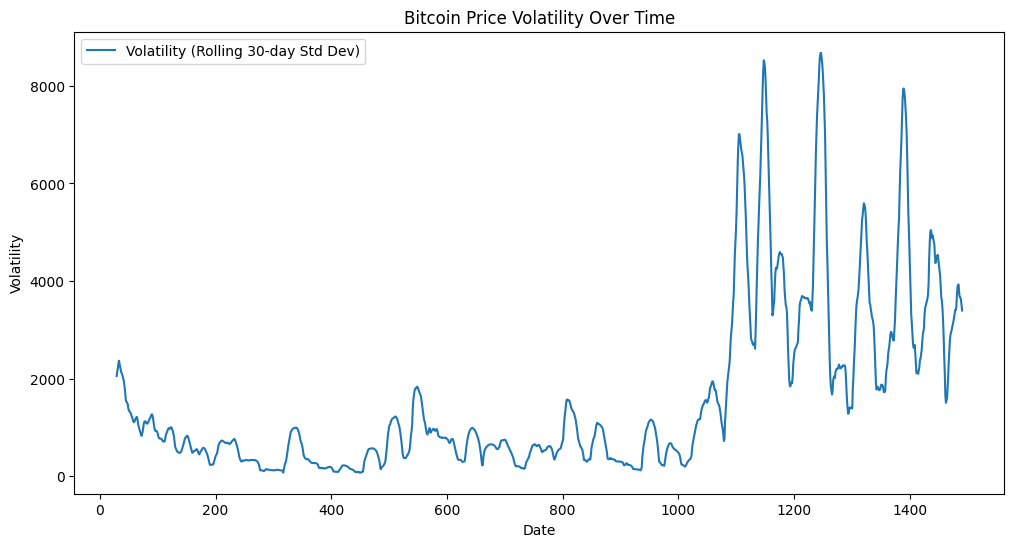

In [74]:
window = 30  # Adjust window size as needed
data['Volatility_High'] = data['High'].rolling(window=window).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility_High'], label='Volatility (Rolling 30-day Std Dev)')
plt.title('Bitcoin Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Hypothsis Testing:


In [77]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your time series data (replace this with your actual time series data)
# For example, if your data is a pandas Series:
# data = pd.Series([...])

# Perform the ADF test
result = adfuller(data['Open'])

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -0.9878555622003392
p-value: 0.7576678944897712
Critical Values:
   1%: -3.434815425568625
   5%: -2.8635121913888306
   10%: -2.567819976000063


## Report :

`1. The data is not stationary `

`2. we need not check all  the columns ; because of high corr`

`3. we need to convert non-stationary to stationary`

## Differencing :

`Stationarity often requires constant mean and variance. If a time series has a trend, differencing can help remove it.`

In [75]:

# Assuming 'data' is your non-stationary time series data
stationary_series = data[['Open', 'High', 'Low', 'Close', 'Adj Close']].diff().dropna()

In [76]:
stationary_series

,Open,High,Low,Close,Adj Close
1,-487.200195,1332.399414,8.899414,1324.899414,1324.899414
2,1353.200195,128.200196,1680.900391,218.900391,218.900391
3,292.500000,166.900390,-322.299805,398.200195,398.200195
4,206.500000,1965.499024,680.599610,1830.299805,1830.299805
5,1984.899414,7.201172,1561.799804,97.500000,97.500000
...,...,...,...,...,...
1487,-108.636719,-1677.085937,-745.625000,286.113281,286.113281
1488,286.566407,804.554687,581.828125,646.097656,646.097656
1489,652.269531,623.382813,1195.363281,353.847657,353.847657
1490,371.203125,-309.921875,31.238282,-220.578125,-220.578125


In [80]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# Perform the ADF test
result = adfuller(stationary_series['Open'])

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -7.375616298389466
p-value: 8.73861422952593e-11
Critical Values:
   1%: -3.434815425568625
   5%: -2.8635121913888306
   10%: -2.567819976000063


# Conclusion Data is stationary Now

In [82]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volatility_Open,Volatility_High
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,NaN,NaN,NaN
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,NaN,NaN,NaN
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,NaN,NaN,NaN
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,NaN,NaN,NaN
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1487,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,3675.729958,3688.557134,3668.989934
1488,2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,3660.498327,3676.043308,3663.334915
1489,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,3572.081278,3659.098941,3612.588375
1490,2022-01-30,38151.917969,38266.339844,37437.710938,37917.601563,37917.601563,14643548444,3509.165646,3570.728303,3509.615860
